In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv('forestfires.csv')

In [4]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [0]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data.iloc[:,2]=lb.fit_transform(data.iloc[:,2])
data.iloc[:,3]=lb.fit_transform(data.iloc[:,3])

In [6]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [0]:
features=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
x=data[features]

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(x)


In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
x_new=pca.fit_transform(scaled_x)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)


[0.31717137 0.14544482 0.13567661 0.11108157]


In [0]:
scaled_x=pd.DataFrame(scaled_x,columns=features)

In [11]:
scaled_x.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

In [12]:
pca.components_

array([[-0.4258805 , -0.43253772, -0.43160308, -0.36188768, -0.48755569,
         0.23027906,  0.12369235, -0.05352952, -0.07340853],
       [-0.15022404,  0.44209103,  0.36489189, -0.08158411, -0.21204219,
         0.71084578, -0.03860825,  0.28064294, -0.10803489],
       [ 0.27194267, -0.05944668, -0.22150388,  0.47223497, -0.14032083,
         0.1061386 ,  0.69744887,  0.35727966, -0.07351478],
       [-0.09678912,  0.07190601,  0.02168894, -0.1102274 , -0.00848188,
         0.03450063,  0.18052159,  0.07754418,  0.96590762]])

In [13]:
pca.explained_variance_

array([2.86007441, 1.31154018, 1.22345596, 1.00167163])

In [14]:
df=pd.DataFrame(pca.components_,columns=scaled_x.columns,index=['pc-1','pc-2','pc-3','pc-4'])
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
pc-1,-0.425881,-0.432538,-0.431603,-0.361888,-0.487556,0.230279,0.123692,-0.053530,-0.073409
pc-2,-0.150224,0.442091,0.364892,-0.081584,-0.212042,0.710846,-0.038608,0.280643,-0.108035
pc-3,0.271943,-0.059447,-0.221504,0.472235,-0.140321,0.106139,0.697449,0.357280,-0.073515
pc-4,-0.096789,0.071906,0.021689,-0.110227,-0.008482,0.034501,0.180522,0.077544,0.965908


In [15]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(x_new)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
clusters = k_means.labels_.tolist()
clusters

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [17]:
frame=pd.DataFrame(clusters,columns=['clusters'])
frame_new=pd.concat([data,frame],axis=1)
frame_new.head(10)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,clusters
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0
5,8,6,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,1
6,8,6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,1
7,8,6,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,1
8,8,6,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,1
9,7,5,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,1


In [18]:
x_new_df=pd.DataFrame(x_new)
clusters=pd.DataFrame(clusters)
frame_demo=pd.concat([x_new_df,clusters],axis=1)
frame_demo #dataframe with components and corresponding cluster labels

,0,1,2,3,0
0,3.214556,-0.434848,1.194523,0.137604,0
1,0.205673,-0.691492,-1.559167,-0.555075,1
2,0.431966,-0.492285,-1.344683,-0.498877,1
3,2.879837,1.620077,1.365169,-0.169440,0
4,2.504697,1.666961,0.109349,-0.394080,0
...,...,...,...,...,...
512,0.423327,-0.669930,-2.066893,0.005576,1
513,1.629111,1.098197,-0.517640,1.136165,0
514,1.785798,1.134036,-0.106671,0.570757,0
515,-1.403556,-0.145533,0.133665,-0.292967,1


In [19]:
print(frame_new['clusters'].value_counts())


1    399
0    118
Name: clusters, dtype: int64


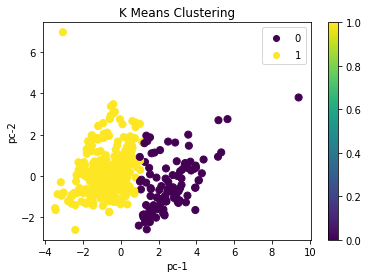

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(frame_demo.iloc[:,0],frame_demo.iloc[:,1],c=clusters[0],s=50)
ax.legend(*scatter.legend_elements())
ax.set_title('K Means Clustering')
ax.set_xlabel('pc-1')
ax.set_ylabel('pc-2')
plt.colorbar(scatter)
#visualisation of components 

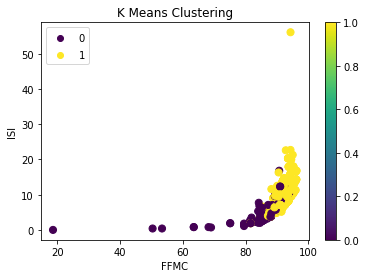

In [23]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(frame_new.iloc[:,4],frame_new.iloc[:,7],c=frame_new['clusters'],s=50)
ax.legend(*scatter.legend_elements())
ax.set_title('K Means Clustering')
ax.set_xlabel('FFMC')
ax.set_ylabel('ISI')
plt.colorbar(scatter)
#visualisation of original data with clusters

In [0]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(frame_new.iloc[:,8],frame_new.iloc[:,9],c=frame_new['clusters'],s=50)
ax.set_title('K Means Clustering')
ax.set_xlabel('temp')
ax.set_ylabel('RH')
plt.colorbar(scatter)

In [0]:
x_class=frame_new.iloc[:,:-1]
y_class=frame_new.iloc[:,13]

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_class,y_class,test_size=0.2,random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [0]:
accuracy_score(y_test,y_pred)

In [0]:
confusion_matrix(y_test,y_pred)